# Lab | Customer Analysis Final Round

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.
It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures

# 01 - Problem (case study)
Data Description.
Goal.

In [1]:
# The dataset used in this exrecise contains information about clients of a car insurance company.
# Our goal is to predict the Total Claim Amount (y) based the different variables that the data contains.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from scipy import stats

# 02 - Getting Data
Read the .csv file.

In [3]:
data = pd.read_csv("C:/Users/joaoc/Ironhack_exercises/files_for_lab_final_round/csv_files/marketing_customer_analysis.csv")
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


# 03 - Cleaning/Wrangling/EDA
Change headers names.
Deal with NaN values.

In [4]:
display(data.shape)
display(data.isna().sum()) # No Null Values

(9134, 24)

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [5]:
cols = []
for column in data.columns:
    cols.append(column.lower())
data.columns = cols

In [6]:
data = data.rename(columns = {"employmentstatus" : "employment status"})

In [7]:
display(data)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly premium auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months since policy inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


Categorical Features.
Numerical Features.

In [9]:
num = pd.DataFrame(data.select_dtypes(np.number))
X_cat = pd.DataFrame(data.select_dtypes("object"))

In [10]:
list(data.select_dtypes(['number']))

['customer lifetime value',
 'income',
 'monthly premium auto',
 'months since last claim',
 'months since policy inception',
 'number of open complaints',
 'number of policies',
 'total claim amount']

In [11]:
list(data.select_dtypes(['object']))

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective to date',
 'employment status',
 'gender',
 'location code',
 'marital status',
 'policy type',
 'policy',
 'renew offer type',
 'sales channel',
 'vehicle class',
 'vehicle size']

Exploration.

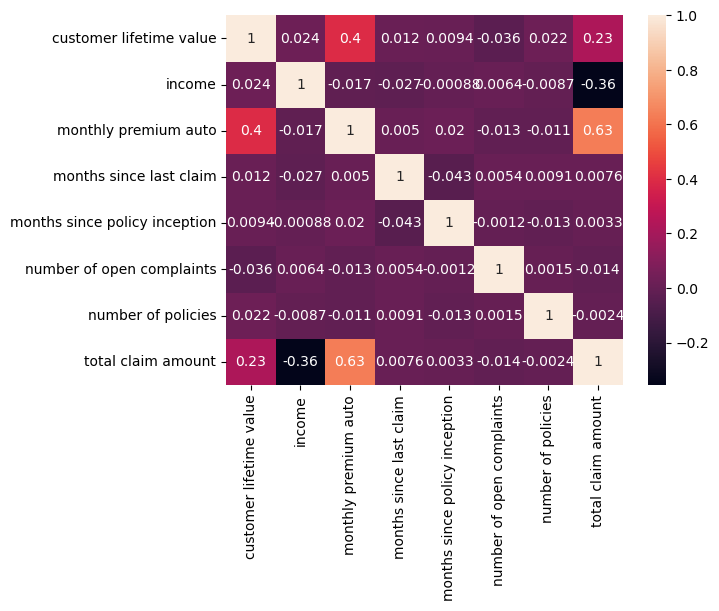

In [12]:
correlations_matrix = num.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# 04 - Processing Data
Dealing with outliers.
Normalization.
Encoding Categorical Data.
Splitting into train set and test set.

In [13]:
y = pd.DataFrame(data['total claim amount'])
X = pd.DataFrame(num["monthly premium auto"]) # Highest correlation

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6393, 1)
(2741, 1)
(6393, 1)
(2741, 1)


In [15]:
# Dealing with outliers

C:\Users\joaoc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='monthly premium auto'>

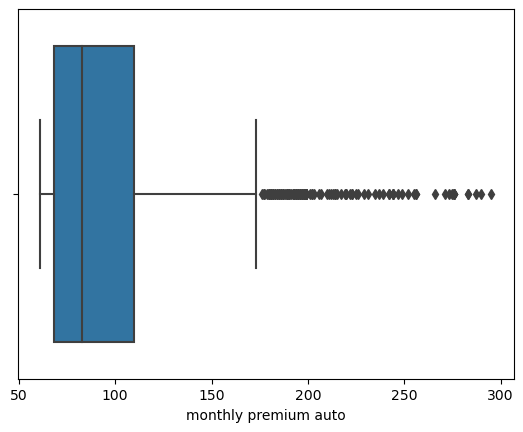

In [16]:
sns.boxplot(X_test["monthly premium auto"])

<AxesSubplot:ylabel='Count'>

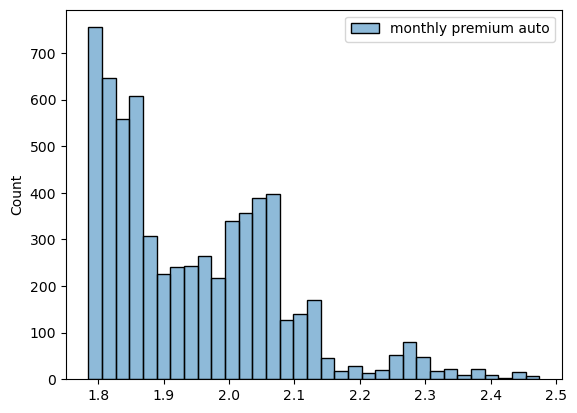

In [17]:
def log_transf(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN
    
    
x_train_log = pd.DataFrame(X_train["monthly premium auto"].apply(log_transf))
x_test_log = pd.DataFrame(X_test["monthly premium auto"].apply(log_transf))

sns.histplot(x_train_log)

In [18]:
# Transforming data

In [19]:
minmax_x_trans = MinMaxScaler()
minmax_x_trans.fit(x_train_log)

x_train_norm_log = minmax_x_trans.transform(x_train_log)
x_train_norm_log = pd.DataFrame(x_train_norm_log, columns=x_train_log.columns)

x_test_norm_log = minmax_x_trans.transform(x_test_log)
x_test_norm_log = pd.DataFrame(x_test_norm_log, columns=x_train_log.columns)

x_train_norm_log

,monthly premium auto
0,0.510085
1,0.178774
2,0.068486
3,0.223824
4,0.000000
...,...
6388,0.010251
6389,0.086761
6390,0.068486
6391,0.020338


<AxesSubplot:ylabel='Count'>

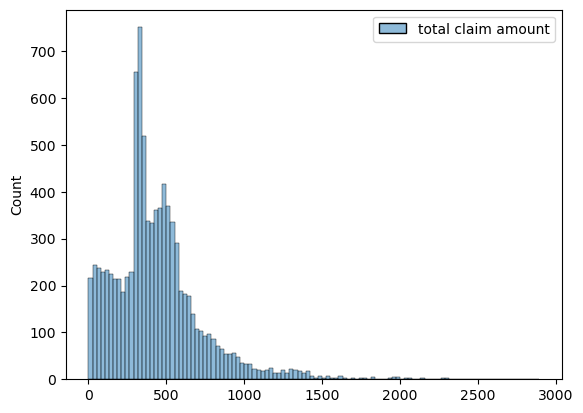

In [20]:
sns.histplot(y)

C:\Users\joaoc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total claim amount'>

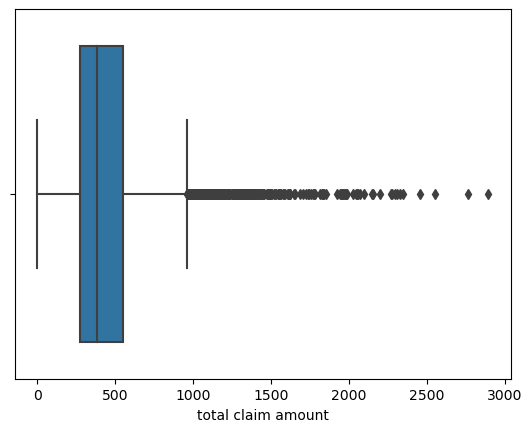

In [21]:
sns.boxplot(y['total claim amount'])

In [22]:
#Encoding categorical data

In [23]:
def label_encoder(df, col):

    X_cat_col = pd.DataFrame(df[col])
    label_encoded = LabelEncoder().fit(X_cat_col).transform(X_cat_col)
    label_encoded = pd.DataFrame(label_encoded,columns=X_cat_col.columns)
    
    return label_encoded

state = label_encoder(X_cat, "state")
response = label_encoder(X_cat, "response")
coverage = label_encoder(X_cat, "coverage")
education = label_encoder(X_cat, "education")
effective_to_date = label_encoder(X_cat, "effective to date")
employment_status = label_encoder(X_cat, "employment status")
gender = label_encoder(X_cat, "gender")
location_code = label_encoder(X_cat, "location code")
marital_status = label_encoder(X_cat, "marital status")
policy_type = label_encoder(X_cat, "policy type")
policy = label_encoder(X_cat, "policy")
renew_offer_type = label_encoder(X_cat, "renew offer type")
sales_channel = label_encoder(X_cat, "sales channel")
vehicle_class = label_encoder(X_cat, "vehicle class")
vehicle_size = label_encoder(X_cat, "vehicle size")

cat_encoded = pd.concat([state, response, coverage, education, 
                         effective_to_date, employment_status,
                         gender, location_code, marital_status, 
                         policy_type, policy, renew_offer_type, 
                         sales_channel, vehicle_class, vehicle_size], axis=1)
cat_encoded


C:\Users\joaoc\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joaoc\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,state,response,coverage,education,effective to date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,4,0,0,0,47,1,0,1,1,0,2,0,0,5,1
1,0,0,1,0,24,4,0,1,2,1,5,2,0,0,1
2,2,0,2,0,41,1,0,1,1,1,5,0,0,5,1
3,1,0,0,0,12,4,1,1,1,0,1,0,2,3,1
4,4,0,0,0,52,1,1,0,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,0,32,1,1,2,1,1,3,1,3,0,1
9130,1,1,1,1,34,1,0,1,0,0,2,0,1,0,1
9131,1,0,1,0,55,4,1,1,2,0,1,0,1,0,1
9132,1,0,1,1,52,1,1,1,1,1,4,2,1,0,0


# 05 - Modeling
Apply model.

In [24]:
# Normalization and logaritmic conversion

lm1 = linear_model.LinearRegression()
lm1.fit(x_train_norm_log,y_train)

LinearRegression()

In [25]:
# Only logaritmic

lm2 = linear_model.LinearRegression()
lm2.fit(x_train_log,y_train)

LinearRegression()

In [26]:
# Regular values

lm3 = linear_model.LinearRegression()
lm3.fit(X_train,y_train)

LinearRegression()

# 06 - Model Validation
R2.
MSE.
RMSE.
MAE.

In [27]:
y_pred_train_1 = lm1.predict(x_train_norm_log)
# y_pred_train
print("R2 score por training is:", r2_score(y_train, y_pred_train_1))
print("MSE for training is:", mean_squared_error(y_train, y_pred_train_1))
print("RMSE for training is:", np.sqrt(mean_squared_error(y_train, y_pred_train_1)))
print("MAE for training is:", mean_absolute_error(y_train, y_pred_train_1))
print("MAPE for training is:", mean_absolute_percentage_error(y_train, y_pred_train_1))

print("------------''------------")

y_pred_test_1 = lm1.predict(x_test_norm_log)
# y_pred_test
print("R2 score por testing is:", r2_score(y_test, y_pred_test_1))
print("MSE for testing is:", mean_squared_error(y_test, y_pred_test_1))
print("RMSE for testing is:", np.sqrt(mean_squared_error(y_test, y_pred_test_1)))
print("MAE for testing is:", mean_absolute_error(y_test, y_pred_test_1))
print("MAPE for testing is:", mean_absolute_percentage_error(y_test, y_pred_test_1))

R2 score por training is: 0.36720366058915155
MSE for training is: 53277.8368348481
RMSE for training is: 230.81992295910703
MAE for training is: 158.96417219291374
MAPE for training is: 2.4818953141628053
------------''------------
R2 score por testing is: 0.3720973964348523
MSE for testing is: 53252.14687744794
RMSE for testing is: 230.76426689903258
MAE for testing is: 158.69268598083792
MAPE for testing is: 3.1159561762319417


In [28]:
y_pred_train_2 = lm2.predict(x_train_log)
# y_pred_train
print("R2 score por training is:", r2_score(y_train, y_pred_train_2))
print("MSE for training is:", mean_squared_error(y_train, y_pred_train_2))
print("RMSE for training is:", np.sqrt(mean_squared_error(y_train, y_pred_train_2)))
print("MAE for training is:", mean_absolute_error(y_train, y_pred_train_2))
print("MAPE for training is:", mean_absolute_percentage_error(y_train, y_pred_train_2))

print("------------''------------")

y_pred_test_2 = lm2.predict(x_test_log)
# y_pred_test
print("R2 score por testing is:", r2_score(y_test, y_pred_test_2))
print("MSE for testing is:", mean_squared_error(y_test, y_pred_test_2))
print("RMSE for testing is:", np.sqrt(mean_squared_error(y_test, y_pred_test_2)))
print("MAE for testing is:", mean_absolute_error(y_test, y_pred_test_2))
print("MAPE for testing is:", mean_absolute_percentage_error(y_test, y_pred_test_2))

R2 score por training is: 0.36720366058915155
MSE for training is: 53277.8368348481
RMSE for training is: 230.81992295910703
MAE for training is: 158.96417219291374
MAPE for training is: 2.4818953141628013
------------''------------
R2 score por testing is: 0.3720973964348523
MSE for testing is: 53252.14687744794
RMSE for testing is: 230.76426689903258
MAE for testing is: 158.69268598083795
MAPE for testing is: 3.1159561762319363


In [29]:
y_pred_train_3 = lm3.predict(X_train)
# y_pred_train
print("R2 score por training is:", r2_score(y_train, y_pred_train_3))
print("MSE for training is:", mean_squared_error(y_train, y_pred_train_3))
print("RMSE for training is:", np.sqrt(mean_squared_error(y_train, y_pred_train_3)))
print("MAE for training is:", mean_absolute_error(y_train, y_pred_train_3))
print("MAPE for training is:", mean_absolute_percentage_error(y_train, y_pred_train_3))

print("------------''------------")

y_pred_test_3 = lm3.predict(X_test)
# y_pred_test
print("R2 score por testing is:", r2_score(y_test, y_pred_test_3))
print("MSE for testing is:", mean_squared_error(y_test, y_pred_test_3))
print("RMSE for testing is:", np.sqrt(mean_squared_error(y_test, y_pred_test_3)))
print("MAE for testing is:", mean_absolute_error(y_test, y_pred_test_3))
print("MAPE for testing is:", mean_absolute_percentage_error(y_test, y_pred_test_3))

R2 score por training is: 0.3997163932766684
MSE for training is: 50540.450476397775
RMSE for training is: 224.81203365566927
MAE for training is: 151.79939378647444
MAPE for training is: 2.46487451841543
------------''------------
R2 score por testing is: 0.3986581590449634
MSE for testing is: 50999.54014567172
RMSE for testing is: 225.83077767583347
MAE for testing is: 151.5682931681787
MAPE for testing is: 3.211989452545781


# 07 - Reporting
Present results.

In [30]:
# Model has better performance with regular values, has room for improvement.

In [31]:
results_train = y_train.copy()
results_train['y_pred'] = y_pred_train_3
results_train['residuals'] = results_train['total claim amount'] - results_train['y_pred']
results_train.head()

,total claim amount,y_pred,residuals
8150,385.440163,668.680210,-283.240047
9074,388.800000,367.537125,21.262875
4401,271.489602,297.628909,-26.139307
5979,234.057985,399.802456,-165.744471
1218,202.847644,259.986024,-57.138380


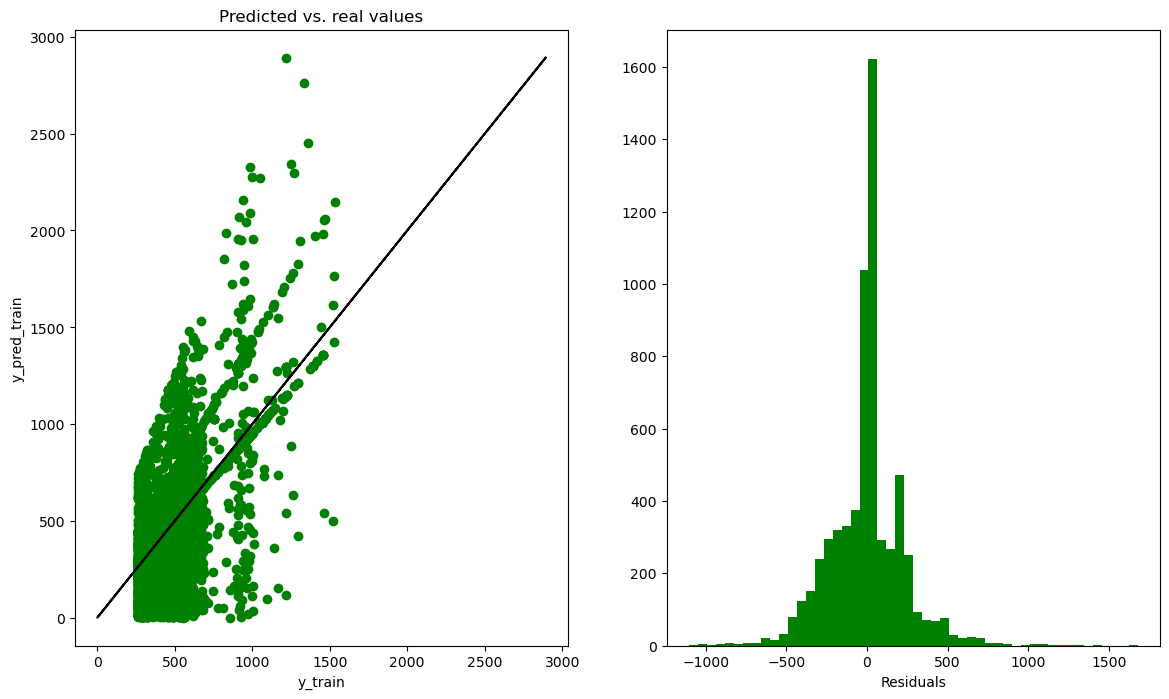

In [32]:
fig, axes = plt.subplots(1,2,figsize=(14,8))
axes[0].scatter(x=results_train['y_pred'], y=results_train['total claim amount'] , color = 'green')
axes[0].plot(results_train['total claim amount'], results_train['total claim amount'], color = 'black')
axes[0].set_xlabel("y_train")
axes[0].set_ylabel("y_pred_train")
axes[0].set_title("Predicted vs. real values")
axes[1].hist(results_train['residuals'], color = "green", bins = 50)
axes[1].set_xlabel("Residuals")
plt.show()